The dataset you will analyze in this HW is the RMS Titanic. https://en.wikipedia.org/wiki/RMS_Titanic.

Your goal is to classify survivability based on the various factors of the passengers. 

For our problem, we will choose the factors listed below:

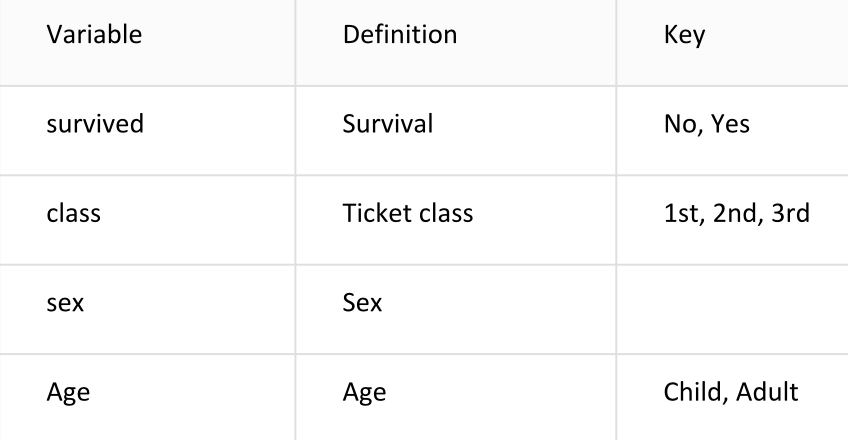

The dataset we will be using can be found in the shared dataset folder. The file name is Titanic.csv

1. Read the dataset into a dataframe. Display the first 5 rows of the dataframe. (2)
2. Explore the dataset and determine what is the target variable. (2)
3. Drop factor(s) that are not likely to be relevant for logistic regression. (2)
4. Make sure there are no missing values. Handle missing values if any. (2)
5. Plot count plots of each of the remaining factors (including the target variable). (3)
6. Convert all categorical feature variables into dummy variables. (3)
7. Partition the data into train and test sets (70/30). Use random_state = 2020. (2)
8. Fit the training data to a logistic regression model. (2)
9. Predict the outcomes for the test set. (2)
10. Display the accuracy of your predictions for survivability. (2)
11. Display the confusion matrix along with the labels (Yes, No).
Hint: You may want to use from sklearn.metrics import plot_confusion_matrix (2)
12. Now, display the predicted value of the survivability of a male adult passenger traveling in 3 rd class. (3)
13. Next, display the predicted probability of the survivability of a male adult passenger traveling in 3 rd class. (3)

In [ ]:
# import all necessary libraries here

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from   sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import  matplotlib.pyplot as plt

In [ ]:
# example -- not needed
x_new = [0,0,1,0,0,1]
#model.predict(x_new)
#model.predict_proba

   Passenger Class   Sex    Age Survived
0          1   3rd  Male  Child       No
1          2   3rd  Male  Child       No
2          3   3rd  Male  Child       No
3          4   3rd  Male  Child       No
4          5   3rd  Male  Child       No
Passenger    0
Class        0
Sex          0
Age          0
Survived     0
dtype: int64


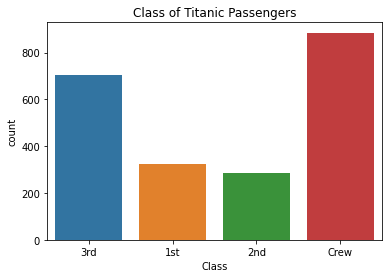

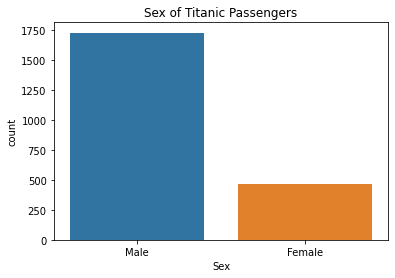

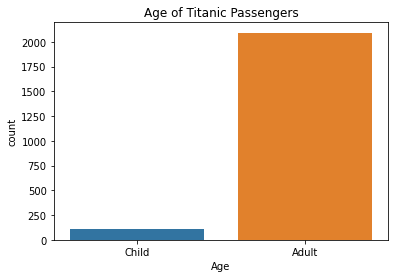

      Class_1st  Class_2nd  Class_3rd  ...  Sex_Male  Age_Adult  Age_Child
0             0          0          1  ...         1          0          1
1             0          0          1  ...         1          0          1
2             0          0          1  ...         1          0          1
3             0          0          1  ...         1          0          1
4             0          0          1  ...         1          0          1
...         ...        ...        ...  ...       ...        ...        ...
2196          0          0          0  ...         0          1          0
2197          0          0          0  ...         0          1          0
2198          0          0          0  ...         0          1          0
2199          0          0          0  ...         0          1          0
2200          0          0          0  ...         0          1          0

[2201 rows x 8 columns]
[[408  45]
 [105 103]]
Accuracy of model is:  0.773071104387292


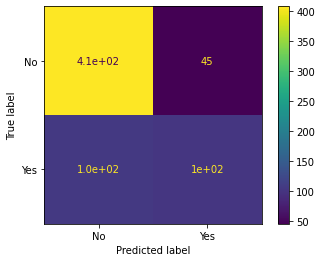

Prediction for male adult in 3rd class ['No']
Predicted probability for male adult in 3rd class [[0.88861482 0.11138518]]


In [ ]:
# solution starts here
#read
titanic = pd.read_csv("Titanic.csv")
print(titanic.head())

# Survived is target

print(titanic.isnull().sum())
# no missing values

# column passenger not required -- remove it

titanic.drop(titanic.columns[0], axis=1, inplace=True)

plt.figure(1)
sb.countplot(x="Class", data=titanic)
plt.title("Class of Titanic Passengers")
plt.figure(2)
sb.countplot(x="Sex", data=titanic)
plt.title("Sex of Titanic Passengers")
plt.figure(3)
sb.countplot(x="Age", data=titanic)
plt.title("Age of Titanic Passengers")
plt.show()

df2 = pd.get_dummies(titanic, columns=["Class","Sex","Age"])
X=df2.iloc[:,1:]
y=df2.iloc[:,0]
print(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=2020)
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)
print("Accuracy of model is: ",metrics.accuracy_score( y_test,y_pred))

plot_confusion_matrix(LogReg, X_test,y_test)
plt.show()

print("Prediction for male adult in 3rd class", LogReg.predict([[0,0,1,0,0,1,1,0]]))
print("Predicted probability for male adult in 3rd class", LogReg.predict_proba([[0,0,1,0,0,1,1,0]]))

# can be done as X_new = [[0,0,1,0,0,1,1,0]]
# then pass LogReg.predict(X_new) or LogReg.predict_proba(X_new)